# Abalone Case study

This is the dataset for the prediction of age of abalone.It is a regression type problem.

Data Description:

Number of instances: 4177

Number of attributes: 8

Features: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight,
and Shell weight

Target: Rings


           The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope a boring and time-consuming task.Solution for the issue is Create a machine learning algorithm that will predict the age of an abalone from physical measurements only.

Dataset information:
    
    Sex: nominal - M (male), F (female), I (infant)
        
    Length: continuous - longest shell measurement (in mm)
    
    Diameter: continuous - measurement perpendicular to legnth (in mm)
    
    Height: continuous - with meat in shell (in mm)
        
    Whole weight: continuous - the whole abalone (in grams)
    
    Shucked weight: continuous - weight of the meat (in grams)
        
    Viscera weight: continuous - gut weight after bleeding (in grams)
    
    Shell weight: continuous - after being dried (in grams)
        
    Rings: integer - +1.5 gives the age in years
    
    

# Import Librairies

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [390]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [391]:
df.shape

(4177, 9)

Here we have 4177 rows and 9 columns in the dataset

In [392]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no missing values

In [393]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here we have one object type column,one integer type and seven float type columns.So need to convert object type of data into integer using encoder.

<AxesSubplot:>

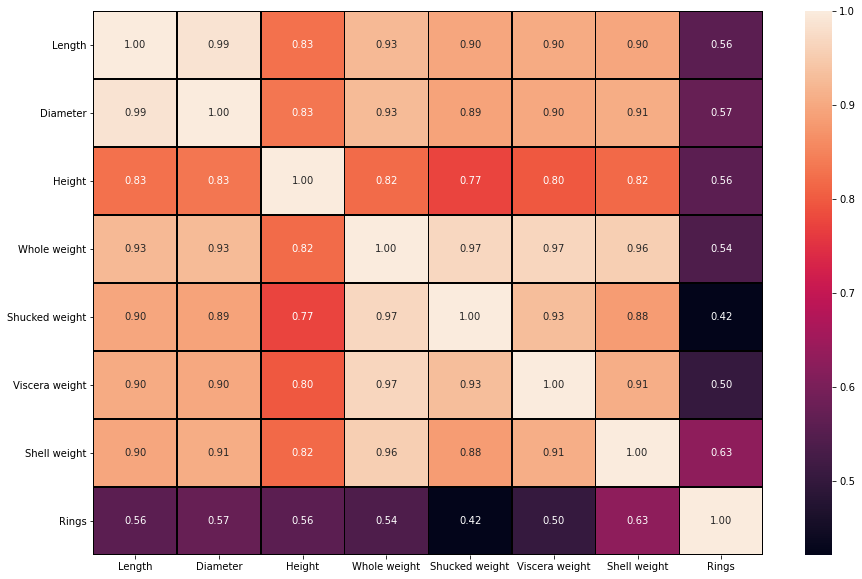

In [394]:
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

We can see that rings and shell weight is highly correlated feature.Least correlation with shucked weight that is 0.42

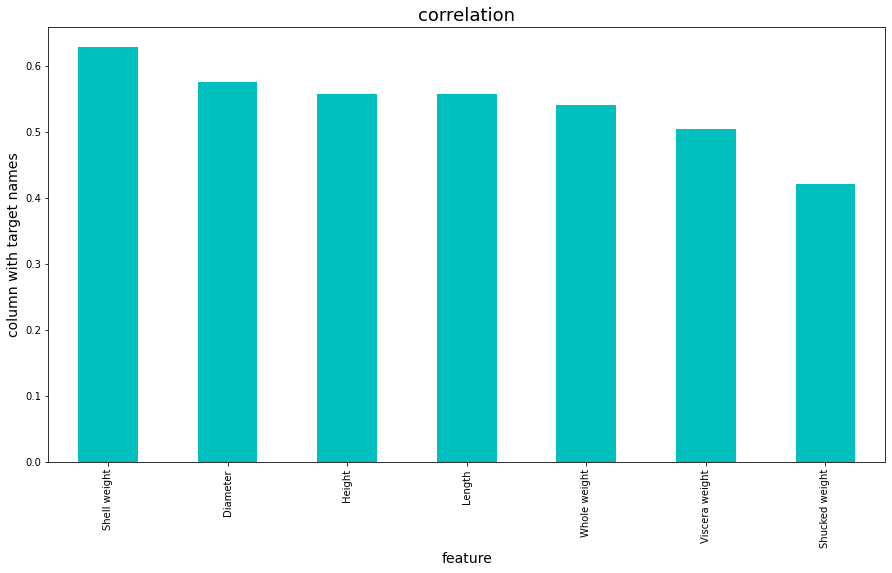

In [395]:
plt.figure(figsize=(15,8))
df.corr()["Rings"].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can see the clear picture of correlated between both indipendend and deppendent.

# EDA

Sex

In [396]:
df.Sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

We can confirm, sex only has 3 categories, mainly - Male, Female and Infant, with Male being the most frequent of them. Let's see their density, to understand by how much is Male greater than Female and Infant in this dataset.

In [397]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

We can see that more males than other two categories

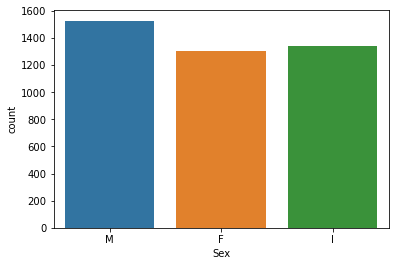

In [398]:
sns.countplot(x="Sex",data=df)
plt.show()

There are about equal proportions of Females and Infants, with slightly more Males, than either Females or Infants.

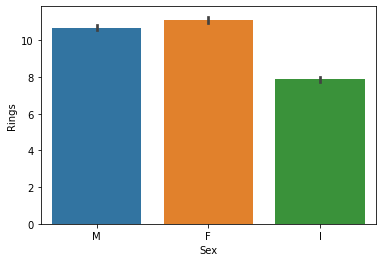

In [399]:
sns.barplot(x="Sex",y="Rings",data=df)
plt.show()

Here we can see that high aged Abalone is female and male .comparitivly low aged group is infant.

Length

# Functions for  QQplot & hist:

In [400]:
def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")

In [401]:
df_abalone=pd.get_dummies(df)
df_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [402]:
df.Length.describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

First thing to notice is mean is less than the median, so we would expect there to be left skewed distribution,Another thing to notice is min is really small  

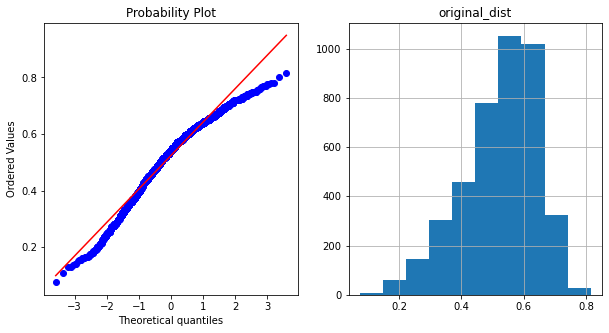

In [403]:
original_dist(df,"Length")

We can see a left skewed normal like shape in histogram and in QQplot can see that length closely follows a normal shape, and while we see deviation at the lowest value and highest length value.Outlier can see in this feature.

Diameter

In [404]:
df.Diameter.describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

Here also mean is less than median so expect left skewness.Lets check QQplot and hist plot for the clarification

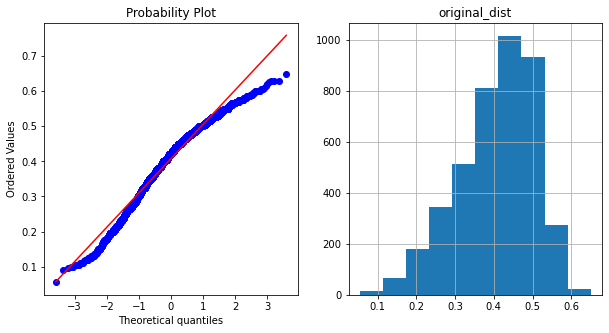

In [405]:
original_dist(df,"Diameter")

here we can see left skewness and in QQplot Density is follows normal  shape, and while we see deviation in highest Diameter value.

Height

In [406]:
df.Height.describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

Here mean is higher than the median so right skewness. Most importent thing we can notice that minimum value zero.

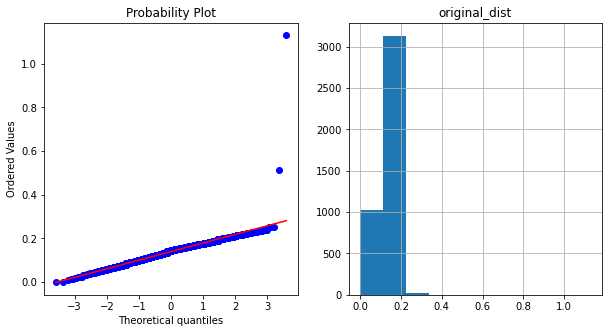

In [407]:
original_dist(df,"Height")

In QQplot two outlier are very far from the wiskers and the Height is completly cower the actual value except two outlier.

In [408]:
df["Whole weight"].describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Whole weight, dtype: float64

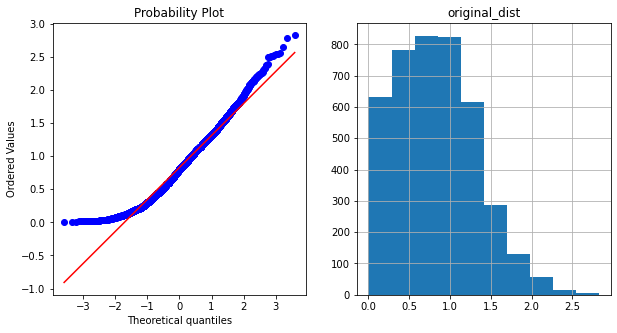

In [409]:
original_dist(df,"Whole weight")

Left skewness and in the center of the QQplot close to actual value and while we see high deviation in the lowest level

# Outlier 

In [410]:
zscr=np.abs(zscore(df_abalone))

threshold=3
print(np.where(zscr>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

If removing the outlier huge data may be lost

# skewness

In [411]:
df_abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

# Separating the columns into features and target

In [412]:
x =df_abalone.drop(columns=["Rings"])
y = df_abalone[["Rings"]]

split the new dataset df_abalone_new as x and y

In [413]:
# remove the skewness
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
x.skew()

Length           -1.172354
Diameter         -1.149520
Height           -7.193805
Whole weight     -1.075285
Shucked weight   -0.478508
Viscera weight   -0.497509
Shell weight     -1.090070
Sex_F             0.806641
Sex_I             0.765137
Sex_M             0.556641
dtype: float64

now here we can see the after removing the x input except catogorical column

In [414]:
lr = LinearRegression()

In [415]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")
          

At random state 0,the training accuracy is :- 0.5224766385661772
At random state0,the testing accuracy is :- 0.533217356198751


At random state 1,the training accuracy is :- 0.5274650172669446
At random state1,the testing accuracy is :- 0.5142820205414274


At random state 2,the training accuracy is :- 0.5225378875839028
At random state2,the testing accuracy is :- 0.5288378385625909


At random state 3,the training accuracy is :- 0.5312331930317878
At random state3,the testing accuracy is :- 0.4945577750620076


At random state 4,the training accuracy is :- 0.5278775680921071
At random state4,the testing accuracy is :- 0.5089274853653827


At random state 5,the training accuracy is :- 0.5317775994064493
At random state5,the testing accuracy is :- 0.4961469111933712


At random state 6,the training accuracy is :- 0.5184482295380175
At random state6,the testing accuracy is :- 0.5503616851657482


At random state 7,the training accuracy is :- 0.5213370924149299
At random state7,the testi

At random state 73,the training accuracy is :- 0.5250100328117753
At random state73,the testing accuracy is :- 0.5234526928430823


At random state 74,the training accuracy is :- 0.529921379201453
At random state74,the testing accuracy is :- 0.505208860787949


At random state 75,the training accuracy is :- 0.5228656366631956
At random state75,the testing accuracy is :- 0.5339301056387996


At random state 76,the training accuracy is :- 0.5275629720834065
At random state76,the testing accuracy is :- 0.5061584524922987


At random state 77,the training accuracy is :- 0.5216528392695354
At random state77,the testing accuracy is :- 0.5344955781740934


At random state 78,the training accuracy is :- 0.5311240908369352
At random state78,the testing accuracy is :- 0.4917858130077972


At random state 79,the training accuracy is :- 0.5243893966056368
At random state79,the testing accuracy is :- 0.5222195980198051


At random state 80,the training accuracy is :- 0.5289878087058041
At random st

At random state 12 the model accuracy is 56.let try feature select for improving the accuracy

# Feature selection using pearson correlation

In [416]:
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.769137,0.714657,0.769864,0.928720,0.607769,0.465701,0.809943,0.0,0.0,1.0
1,0.704730,0.642316,0.765252,0.847476,0.463384,0.364682,0.744179,0.0,0.0,1.0
2,0.809267,0.748887,0.800517,0.957583,0.635374,0.521097,0.840797,1.0,0.0,0.0
3,0.760590,0.714657,0.793701,0.929121,0.599537,0.484881,0.812899,0.0,0.0,1.0
4,0.691042,0.634133,0.755303,0.838549,0.447309,0.340564,0.724503,0.0,1.0,0.0


In [417]:
x_train.shape,x_test.shape

((3341, 10), (836, 10))

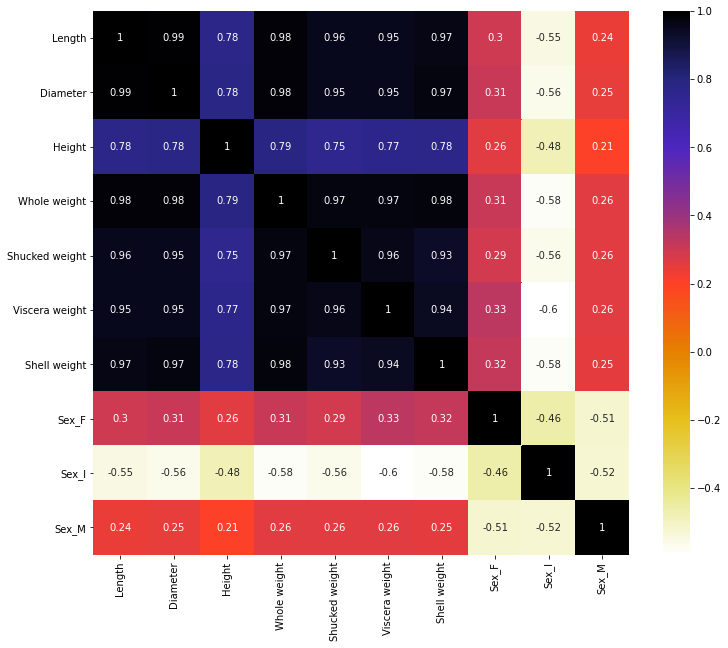

In [418]:
# using pearson correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [419]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # name of the column
                col_corr.add(colname)
            
    return col_corr
        

In [420]:
corr_features = correlation(x_train,0.85)
len(set(corr_features))

5

 we have 5 most correlated features

In [421]:
corr_features

{'Diameter',
 'Shell weight',
 'Shucked weight',
 'Viscera weight',
 'Whole weight'}

In [422]:
x_train=x_train.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)

drop the highly correlated features,

In [423]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.5224766385661772
At random state0,the testing accuracy is :- 0.533217356198751


At random state 1,the training accuracy is :- 0.5274650172669446
At random state1,the testing accuracy is :- 0.5142820205414274


At random state 2,the training accuracy is :- 0.5225378875839028
At random state2,the testing accuracy is :- 0.5288378385625909


At random state 3,the training accuracy is :- 0.5312331930317878
At random state3,the testing accuracy is :- 0.4945577750620076


At random state 4,the training accuracy is :- 0.5278775680921071
At random state4,the testing accuracy is :- 0.5089274853653827


At random state 5,the training accuracy is :- 0.5317775994064493
At random state5,the testing accuracy is :- 0.4961469111933712


At random state 6,the training accuracy is :- 0.5184482295380175
At random state6,the testing accuracy is :- 0.5503616851657482


At random state 7,the training accuracy is :- 0.5213370924149299
At random state7,the testi

At random state 77,the training accuracy is :- 0.5216528392695354
At random state77,the testing accuracy is :- 0.5344955781740934


At random state 78,the training accuracy is :- 0.5311240908369352
At random state78,the testing accuracy is :- 0.4917858130077972


At random state 79,the training accuracy is :- 0.5243893966056368
At random state79,the testing accuracy is :- 0.5222195980198051


At random state 80,the training accuracy is :- 0.5289878087058041
At random state80,the testing accuracy is :- 0.5042074906094178


At random state 81,the training accuracy is :- 0.5183960828965866
At random state81,the testing accuracy is :- 0.5491625249600971


At random state 82,the training accuracy is :- 0.5163654060107907
At random state82,the testing accuracy is :- 0.5563585025080757


At random state 83,the training accuracy is :- 0.5288763050803913
At random state83,the testing accuracy is :- 0.5013576411246


At random state 84,the training accuracy is :- 0.5285210887321395
At random sta

Now also same as before accuracy

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [425]:
lr.fit(x_train,y_train)

LinearRegression()

In [426]:
pred_test=lr.predict(x_test)

In [427]:
print(r2_score(y_test,pred_test))

0.5651657724463084


In [428]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

0.44118073668861446


In [429]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_test=rfr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5992482649959701


In [430]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5341712529656919


# Lets check cross validation 

In [431]:
scr = cross_val_score(lr,x,y,cv=3,scoring='r2')
print("cross validation score of lr model:",scr.mean())

cross validation score of lr model: 0.4992008084520079


r2_score is 56 & cross validation is 49.there slight differents but no overfitting

In [432]:
scr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print("cross validation score of svr model:",scr.mean())

cross validation score of svr model: 0.3880256544097886


r2_score is 44 & cross validation 38

In [433]:
scr = cross_val_score(rfr,x,y,cv=3,scoring='r2')
print("cross validation score of rfr model:",scr.mean())

cross validation score of rfr model: 0.51426103347898


r2 score is 59 & cross validation 51

In [434]:
scr = cross_val_score(knr,x,y,cv=3,scoring='r2')
print("cross validation score of knr model:",scr.mean())

cross validation score of knr model: 0.4547289240146413


r2 score 53 & cross validation 45

Here we can conclude that SVR is the best model

# Hyper parameter tuning

In [438]:
parameter ={"degree":np.arange(0,10),
           "gamma":["scale","auto"]}

In [439]:
gcv=GridSearchCV(svr,parameter,cv=3)

In [440]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto']})

In [441]:
gcv.best_params_

{'degree': 0, 'gamma': 'scale'}

In [443]:
final_mod =SVR(degree=0,gamma="scale")
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

44.11807366886145


cross validation score is 38 now it will increase to 44.

# saving the model

In [444]:
import joblib
joblib.dump(final_mod,"abalone.pkl")

['abalone.pkl']